# Similarity sequences analysis
--------------------------------------------------------------------------------


Author: Belén Otero Carrasco

Last updated 24 April 2024

--------------------------------------------------------------------------------

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from scipy import stats
from sklearn.metrics import jaccard_score
from sklearn.metrics import pairwise_distances
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import mannwhitneyu, levene
import mysql.connector
import re
from ast import literal_eval

### Similarity by datasets

In [99]:
simi_treatvscan = pd.read_csv(("AllProteins_SimilitudTreatmentvsCancers.csv"),sep= ",")

In [100]:
simi_treat = pd.read_csv(("AllProteins_SimilitudLungCancerTreatment.csv"),sep= ",")

In [101]:
simi_full = pd.read_csv(("AllProteins_SimilitudLungCancerFullConMismaProt.csv"),sep= ",")

In [102]:
simi_dise_lung = pd.read_csv(("AllProteins_SimilitudLungCancerDisease.csv"),sep= ",")

In [103]:
simi_immune= pd.read_csv(("AllProteins_%SimilitudAutoimmuneDisease.csv"),sep= ",")

In [104]:
simi_rare = pd.read_csv(("AllProteins_%SimilitudRareDisease.csv"),sep= ",")

### Describe data 

In [11]:
simi_treatvscan.describe()

Similaridad  SimilaridadAA  similaridadAA_2  similaridadBlosum
count  302224.000000  302224.000000    302224.000000      302224.000000
mean       28.813926      50.549192        36.305730          58.704623
std         8.601007      20.289527        11.544729           4.926356
min         0.454953       0.454953         0.454953          42.046609
25%        23.052097      34.778182        28.503788          55.509709
50%        30.639809      52.897196        38.699690          59.215168
75%        36.097852      68.613861        46.052632          62.269854
max        99.667406     100.000000        99.833703          99.761791

In [12]:
simi_treat.describe()

Similaridad  SimilaridadAA  similaridadAA_2  similaridadBlosum
count  2652.000000    2652.000000      2652.000000        2652.000000
mean     31.351628      55.800203        39.529462          60.427545
std       9.018264      19.702628        11.532015           5.487288
min       2.589251       2.589251         2.589251          45.132024
25%      26.906158      43.053245        33.692053          57.680352
50%      32.746333      58.359436        41.711608          60.456817
75%      37.541391      73.142415        48.134328          63.578275
max      90.371457      97.182377        93.698770          96.598599

In [13]:
df_full = simi_full[simi_full['Proteina1'] != simi_full['Proteina2']]

In [14]:
df_full.describe()

Similaridad  SimilaridadAA  similaridadAA_2  similaridadBlosum
count  909162.000000  909162.000000    909162.000000      909162.000000
mean       27.710122      47.830370        34.739893          57.857934
std         9.014903      20.667222        11.953857           4.856046
min         0.937175       0.937175         0.937175          42.213826
25%        21.208791      30.987395        26.030928          54.467975
50%        28.995902      48.697183        36.462729          58.269577
75%        35.392321      66.270431        44.975288          61.653818
max        99.589041      99.794521        99.589041          99.707003

In [15]:
simi_dise_lung.describe()

Similaridad  SimilaridadAA  similaridadAA_2  similaridadBlosum
count  812702.000000  812702.000000    812702.000000      812702.000000
mean       27.552708      47.459438        34.520934          57.740908
std         9.069390      20.715443        12.010812           4.835662
min         0.937175       0.937175         0.937175          42.213826
25%        20.961887      30.469925        25.684394          54.330444
50%        28.792453      48.206522        36.183287          58.146147
75%        35.275623      65.932642        44.801980          61.558045
max        99.589041      99.794521        99.589041          99.707003

In [16]:
simi_immune.describe()

Similaridad  SimilaridadAA  similaridadAA_2  similaridadBlosum
count  140244.000000  140244.000000    140244.000000      140244.000000
mean       29.471423      52.058989        37.194339          59.039481
std         8.173877      19.557676        10.991107           4.755932
min         1.318681       1.318681         1.318681          42.192479
25%        24.029024      37.007624        29.826863          56.054807
50%        31.414474      54.886299        39.692408          59.588976
75%        36.308204      69.353070        46.320157          62.390552
max        98.202247      99.438202        98.932584          99.176556

In [17]:
simi_rare.describe()

Similaridad  SimilaridadAA  similaridadAA_2  similaridadBlosum
count  1352.000000    1352.000000      1352.000000        1352.000000
mean     25.918008      45.042138        32.624567          57.261413
std      11.008288      23.660605        14.598808           5.929105
min       0.201422       0.201422         0.201422          43.513301
25%      19.384968      26.946498        23.630079          53.830268
50%      29.109537      48.787263        36.887019          58.286203
75%      34.752498      65.594774        44.378321          61.608040
max      41.616162      83.823529        53.482587          83.784318

### Plot similarity

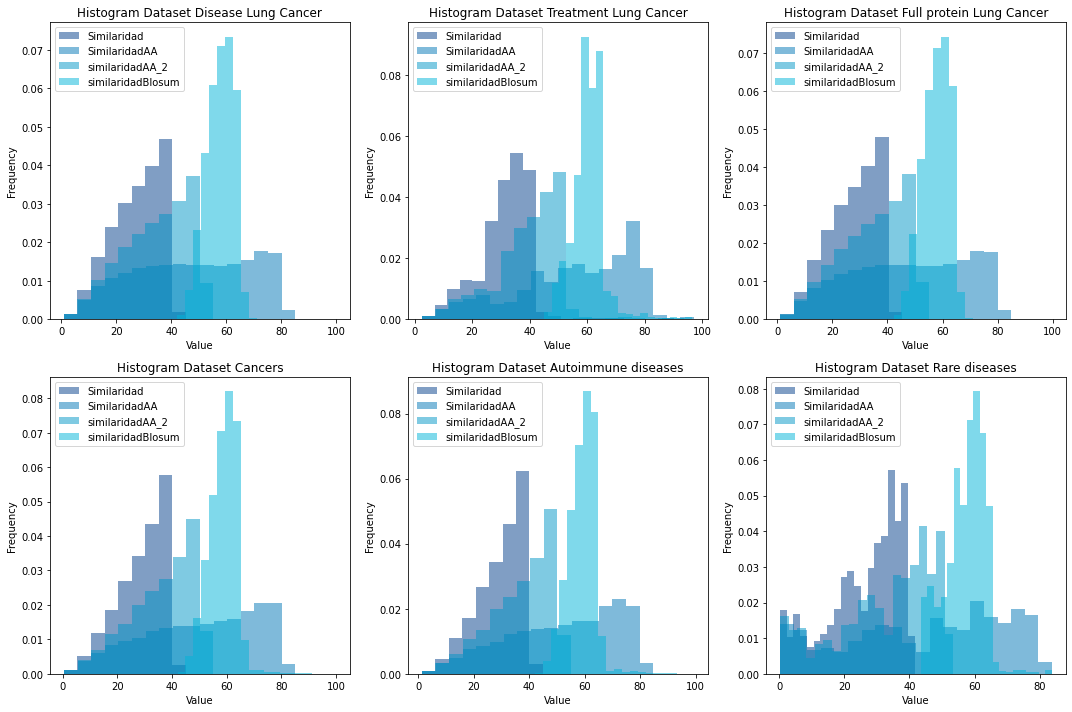

In [86]:
datasets = [simi_dise_lung,simi_treat ,df_full, simi_treatvscan, simi_immune, simi_rare]
datasets = [
    ('Disease Lung Cancer', simi_dise_lung),
    ('Treatment Lung Cancer', simi_treat),
    ('Full protein Lung Cancer', df_full),
    ('Cancers', simi_treatvscan),
    ('Autoimmune diseases', simi_immune),
    ('Rare diseases', simi_rare)
]


column_names = ['Similaridad', 'SimilaridadAA', 'similaridadAA_2', 'similaridadBlosum']


fig, axs = plt.subplots(2, 3, figsize=(15, 10))


for i, (dataset_name, dataset) in enumerate(datasets):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.set_title(f'Histogram Dataset {dataset_name}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    for column_name in column_names:
        ax.hist(dataset[column_name], bins=20, alpha=0.5, label=column_name, density=True)
    ax.legend()


plt.tight_layout()
plt.savefig("Histogram_six_datasets.svg")
plt.show()


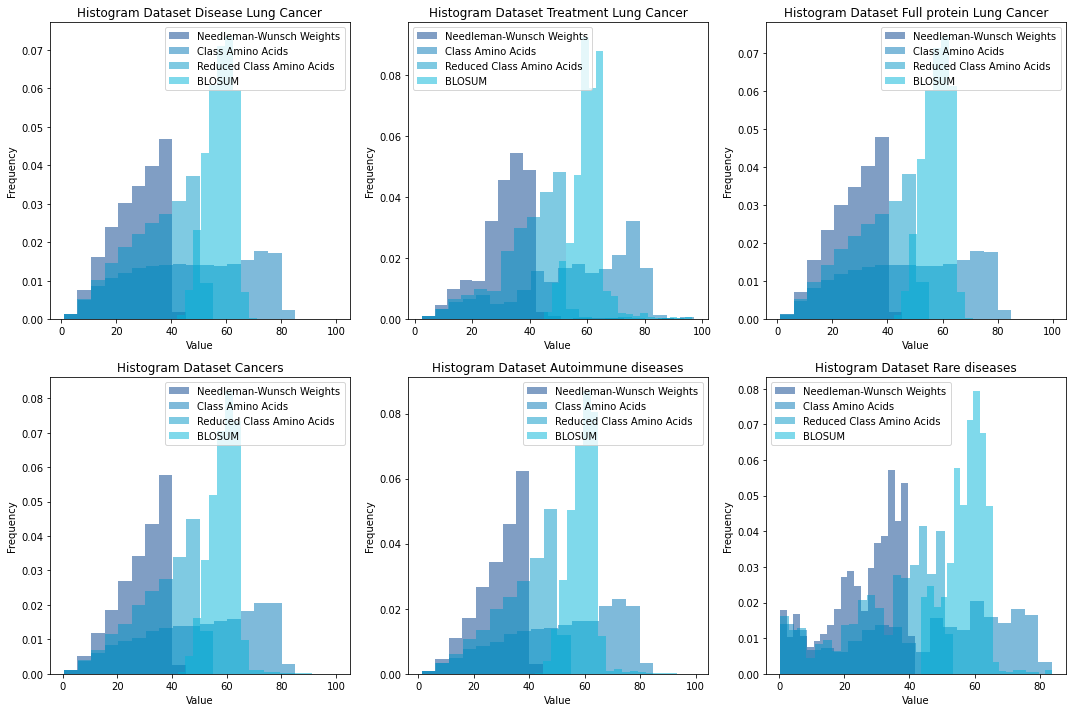

In [88]:
datasets = [
    ('Disease Lung Cancer', simi_dise_lung),
    ('Treatment Lung Cancer', simi_treat),
    ('Full protein Lung Cancer', df_full),
    ('Cancers', simi_treatvscan),
    ('Autoimmune diseases', simi_immune),
    ('Rare diseases', simi_rare)
]


column_names = ['Similaridad', 'SimilaridadAA', 'similaridadAA_2', 'similaridadBlosum']
legend_names = ['Needleman-Wunsch Weights', 'Class Amino Acids', 'Reduced Class Amino Acids', 'BLOSUM']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, (dataset_name, dataset) in enumerate(datasets):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.set_title(f'Histogram Dataset {dataset_name}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    for column_name, legend_name in zip(column_names, legend_names):
        ax.hist(dataset[column_name], bins=20, alpha=0.5, label=legend_name, density=True)
    ax.legend()

plt.tight_layout()
plt.savefig("Histogram_six_datasets_new_names.svg")
plt.show()


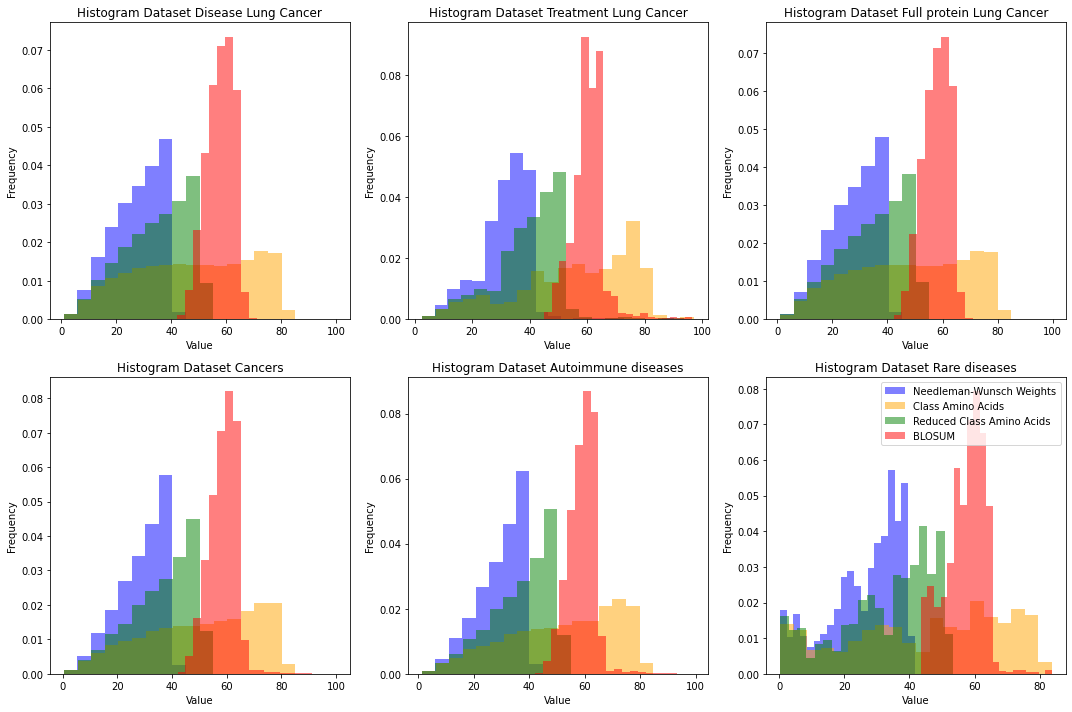

In [91]:
import matplotlib.pyplot as plt

datasets = [
    ('Disease Lung Cancer', simi_dise_lung),
    ('Treatment Lung Cancer', simi_treat),
    ('Full protein Lung Cancer', df_full),
    ('Cancers', simi_treatvscan),
    ('Autoimmune diseases', simi_immune),
    ('Rare diseases', simi_rare)
]

column_names = ['Similaridad', 'SimilaridadAA', 'similaridadAA_2', 'similaridadBlosum']
legend_names = ['Needleman-Wunsch Weights', 'Class Amino Acids', 'Reduced Class Amino Acids', 'BLOSUM']
colors = ['blue', 'orange', 'green', 'red']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, (dataset_name, dataset) in enumerate(datasets):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.set_title(f'Histogram Dataset {dataset_name}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    for j, (column_name, legend_name) in enumerate(zip(column_names, legend_names)):
        ax.hist(dataset[column_name], bins=20, alpha=0.5, label=legend_name, color=colors[j], density=True)
        
# Plot legend outside the loop
axs[1, 2].legend(loc='upper right', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig("Histogram_six_datasets_new.svg")
plt.show()


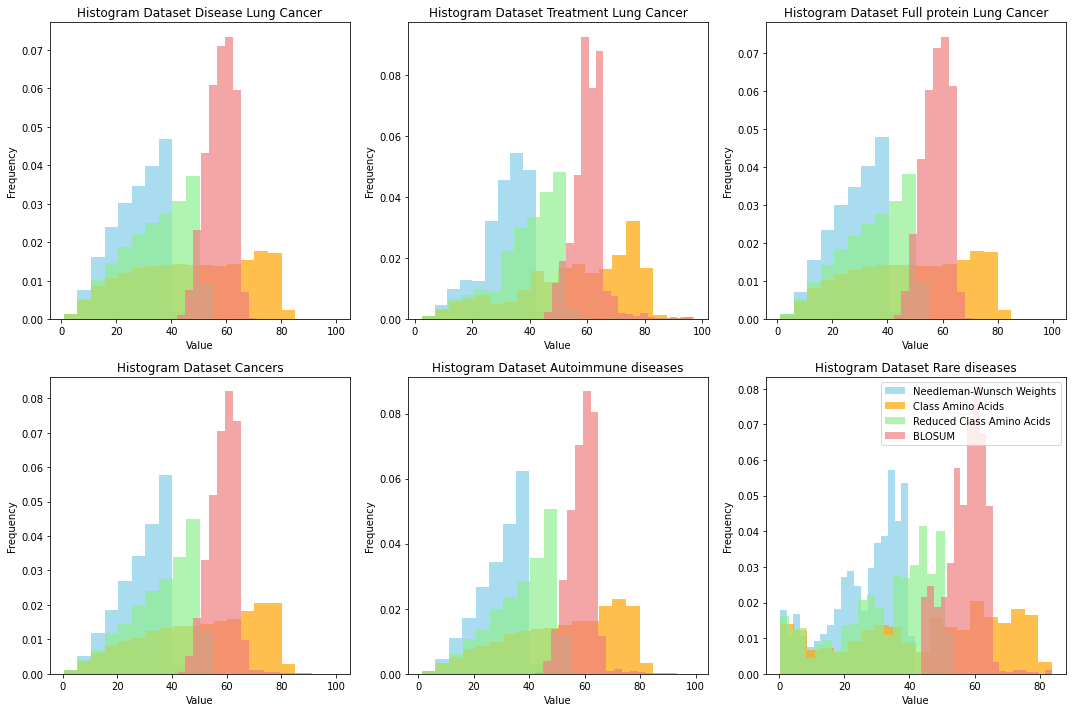

In [94]:
import matplotlib.pyplot as plt

datasets = [
    ('Disease Lung Cancer', simi_dise_lung),
    ('Treatment Lung Cancer', simi_treat),
    ('Full protein Lung Cancer', df_full),
    ('Cancers', simi_treatvscan),
    ('Autoimmune diseases', simi_immune),
    ('Rare diseases', simi_rare)
]

column_names = ['Similaridad', 'SimilaridadAA', 'similaridadAA_2', 'similaridadBlosum']
legend_names = ['Needleman-Wunsch Weights', 'Class Amino Acids', 'Reduced Class Amino Acids', 'BLOSUM']
colors = ['skyblue', 'orange', 'lightgreen', 'lightcoral']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, (dataset_name, dataset) in enumerate(datasets):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.set_title(f'Histogram Dataset {dataset_name}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    for j, (column_name, legend_name) in enumerate(zip(column_names, legend_names)):
        ax.hist(dataset[column_name], bins=20, alpha=0.7, label=legend_name, color=colors[j], density=True)
        
# Plot legend outside the loop
axs[1, 2].legend(loc='upper right')

plt.tight_layout()
plt.savefig("Histogram_six_datasets_new.svg")
plt.show()


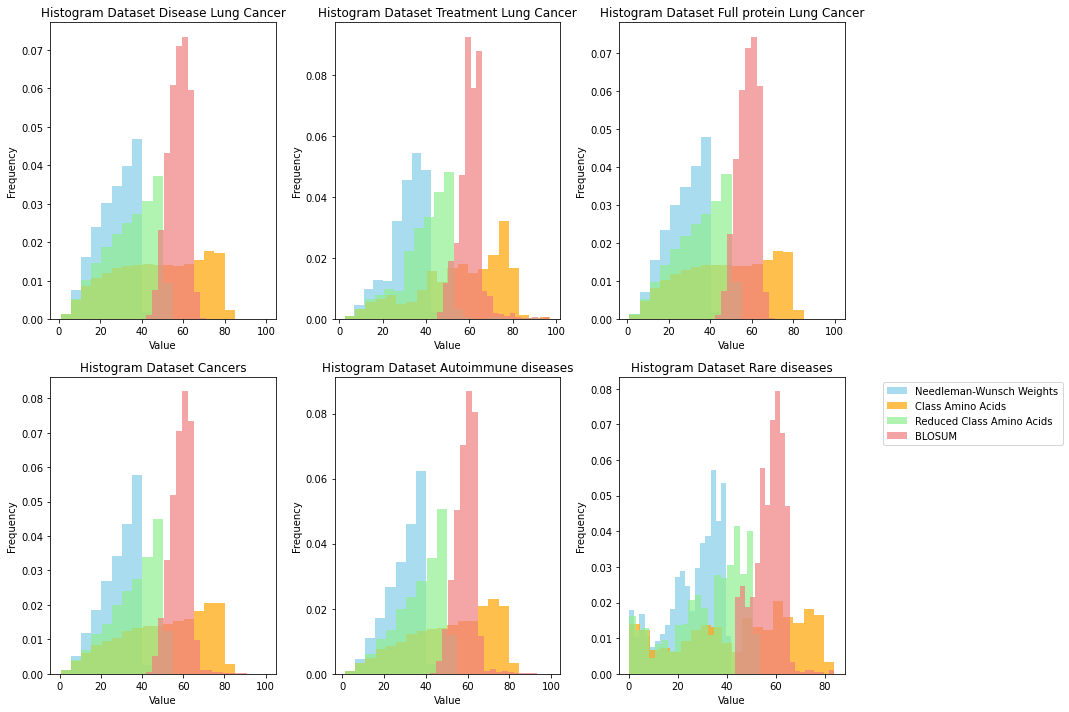

In [97]:
import matplotlib.pyplot as plt

datasets = [
    ('Disease Lung Cancer', simi_dise_lung),
    ('Treatment Lung Cancer', simi_treat),
    ('Full protein Lung Cancer', df_full),
    ('Cancers', simi_treatvscan),
    ('Autoimmune diseases', simi_immune),
    ('Rare diseases', simi_rare)
]

column_names = ['Similaridad', 'SimilaridadAA', 'similaridadAA_2', 'similaridadBlosum']
legend_names = ['Needleman-Wunsch Weights', 'Class Amino Acids', 'Reduced Class Amino Acids', 'BLOSUM']
colors = ['skyblue', 'orange', 'lightgreen', 'lightcoral']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, (dataset_name, dataset) in enumerate(datasets):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.set_title(f'Histogram Dataset {dataset_name}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    for j, (column_name, legend_name) in enumerate(zip(column_names, legend_names)):
        ax.hist(dataset[column_name], bins=20, alpha=0.7, label=legend_name, color=colors[j], density=True)

# Plot legend outside the subplots
plt.legend(loc='upper left', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.savefig("Histogram_six_datasets_new.svg")
plt.show()


### Statistics 

In [30]:
df_combined_simi = pd.concat([df_full['Similaridad'], simi_dise_lung['Similaridad'], simi_treat['Similaridad'], simi_treatvscan['Similaridad'], simi_immune['Similaridad'],simi_rare['Similaridad']], axis=1)

In [32]:
df_combined_simi.columns = ["full","disease","treatment","cancers","immune","rare"]

In [33]:
df_combined_simi

full    disease  treatment    cancers     immune       rare
1       29.179567  13.544892  26.460280  34.447005  20.844640  23.271889
2       13.544892  27.742149  38.553531  32.500000  11.143148  36.764706
3       27.742149  14.595312  30.315421  33.200456  21.031208  23.006834
4       14.595312  16.331269  38.785047  37.068966  13.263229  35.300429
5       16.331269  16.386555  36.039720  35.368957  19.267300  24.173028
...           ...        ...        ...        ...        ...        ...
807930        NaN   6.380952        NaN        NaN        NaN        NaN
808885        NaN  28.027140        NaN        NaN        NaN        NaN
809840        NaN   1.909059        NaN        NaN        NaN        NaN
810795        NaN  16.000000        NaN        NaN        NaN        NaN
811750        NaN  32.638889        NaN        NaN        NaN        NaN

[910013 rows x 6 columns]

In [ ]:
### check normality

In [34]:
 lilliefors(df_full['Similaridad'], dist ='norm')

(0.07289683365344113, 0.0009999999999998899)

In [35]:
 lilliefors(simi_dise_lung['Similaridad'], dist ='norm')

(0.0713468648504968, 0.0009999999999998899)

In [36]:
 lilliefors(simi_treat['Similaridad'], dist ='norm')

(0.12772944936671882, 0.0009999999999998899)

In [37]:
 lilliefors(simi_treatvscan['Similaridad'], dist ='norm')

(0.09153056659669923, 0.0009999999999998899)

In [38]:
 lilliefors(simi_immune['Similaridad'], dist ='norm')

(0.09965017459478354, 0.0009999999999998899)

In [39]:
 lilliefors(simi_rare['Similaridad'], dist ='norm')

(0.1232704899783637, 0.0009999999999998899)

In [40]:
### MannWhitney-U Test

In [41]:
mannwhitneyu(simi_treat['Similaridad'], df_full['Similaridad'])

MannwhitneyuResult(statistic=930436868.0, pvalue=3.832336401936878e-92)

In [42]:
mannwhitneyu(simi_treat['Similaridad'], simi_dise_lung['Similaridad'])

MannwhitneyuResult(statistic=821694398.0, pvalue=1.3698183384024696e-99)

In [44]:
mannwhitneyu(simi_treat['Similaridad'], simi_treatvscan['Similaridad'])

MannwhitneyuResult(statistic=337091335.0, pvalue=1.7248436793974533e-45)

In [43]:
mannwhitneyu(simi_treat['Similaridad'], simi_immune['Similaridad'])

MannwhitneyuResult(statistic=162676932.0, pvalue=9.259851826692811e-29)

In [45]:
mannwhitneyu(simi_treat['Similaridad'], simi_rare['Similaridad'])

MannwhitneyuResult(statistic=1308205.0, pvalue=7.047478815221771e-45)

In [ ]:
### full vs cancers, immune, rare 

In [46]:
mannwhitneyu(df_full['Similaridad'], simi_treatvscan['Similaridad'])

MannwhitneyuResult(statistic=127150065646.0, pvalue=0.0)

In [47]:
mannwhitneyu(df_full['Similaridad'], simi_immune['Similaridad'])

MannwhitneyuResult(statistic=56490400616.0, pvalue=0.0)

In [48]:
mannwhitneyu(df_full['Similaridad'], simi_rare['Similaridad'])

MannwhitneyuResult(statistic=577481679.0, pvalue=6.081335888818508e-05)

### BOXPLOT

In [160]:
treat = simi_treat['Similaridad']
treat = pd.DataFrame(treat)
disease = simi_dise_lung['Similaridad']
disease = pd.DataFrame(disease)
full = df_full['Similaridad']
full = pd.DataFrame(full)
treatvscan = simi_treatvscan['Similaridad']
treatvscan = pd.DataFrame(treatvscan)
immune = simi_immune["Similaridad"]
immune = pd.DataFrame(immune)
rare = simi_rare["Similaridad"]
rare = pd.DataFrame(rare)

treat["Group"] = "Treatment_lung"
disease["Group"] = "Disease_lung"
full["Group"] = "Full_protein_lung"
treatvscan["Group"] = "Cancers"
immune["Group"] = "Immune_diseases"
rare["Group"] = "Rare_diseases"

groups = pd.concat([treat,disease,full,treatvscan,immune,rare])

In [161]:
groups

Similaridad           Group
0       38.997696  Treatment_lung
1       26.460280  Treatment_lung
2       38.553531  Treatment_lung
3       30.315421  Treatment_lung
4       38.785047  Treatment_lung
...           ...             ...
1347    38.195173   Rare_diseases
1348    30.862697   Rare_diseases
1349    40.218712   Rare_diseases
1350    30.346294   Rare_diseases
1351    32.320778   Rare_diseases

[2168336 rows x 2 columns]

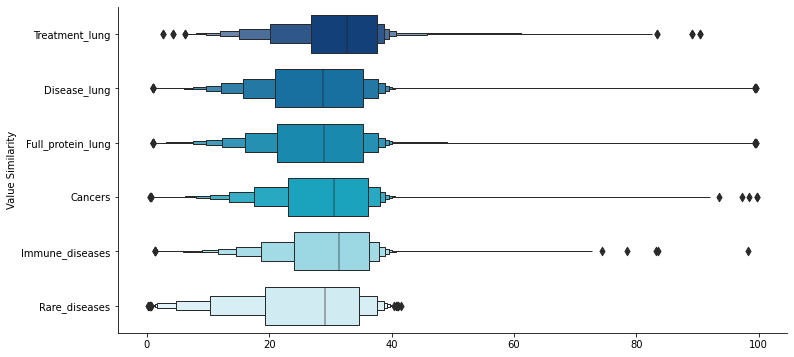

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir una paleta de colores derivados del azul
my_colors = ["#023e8a", "#0077b6", "#0096c7", "#00b4d8", "#90e0ef", "#caf0f8"]

# Configurar la paleta de colores
sns.set_palette(my_colors)

# Crear la figura
fig = plt.figure(figsize=(12, 6))

# Graficar el boxenplot
sns.boxenplot(x="Similaridad", y="Group", data=groups, 
              width=0.7, order=["Treatment_lung", "Disease_lung", "Full_protein_lung", "Cancers","Immune_diseases","Rare_diseases"],
              showfliers=True)

# Personalizar ejes y eliminar despine
plt.xlabel("")
plt.ylabel("Value Similarity")
sns.despine()

# Guardar el gráfico como SVG
plt.savefig("plot_Test_6groups_name.svg")

# Mostrar el gráfico
plt.show()


### Importance of patterns + Drug repurposing

In [ ]:
## load data of pattern found 

In [105]:
prot_by_lung_005 = pd.read_excel("ProtByPatternLung005_summary.xlsx")

In [106]:
prot_by_lung_01 = pd.read_excel("ProtByPatternLung01_summary.xlsx")

In [107]:
prot_by_cancer_005 = pd.read_excel("ProtByPatternCanc005_summary.xlsx")

In [108]:
prot_by_cancer_01 = pd.read_excel("ProtByPatternCanc01_summary.xlsx")

In [109]:
prot_by_immune_005 = pd.read_excel("ProtByPatternImmun005_summary.xlsx")

In [110]:
prot_by_immune_01=pd.read_excel("ProtByPatternImmun01_summary.xlsx")

In [111]:
prot_by_rare_005 = pd.read_excel("ProtByPatternRare005_summary.xlsx")

In [112]:
prot_by_rare_01=pd.read_excel("ProtByPatternRare01_summary.xlsx")

In [ ]:
## functions

In [113]:
def obtained_simi_by_duplas (df_simi, df_pattern):
    
  # loop to obtein only IDs proteins and proteins_treat  
    df_postprocessed = pd.DataFrame(columns=['pattern', 'Proteina2', 'Proteina1'])
    for n, row in df_pattern.iterrows():
        #if n > 0:
        #    break

        pattern: str = row["pattern"]
        proteins: list = literal_eval(row["proteins"])
        proteins_treat: dict = literal_eval(row["proteins_treat"])
        for p in proteins:
            for pt in proteins_treat:
                new_row = pd.DataFrame([{
                    'pattern': pattern, 
                    'Proteina2': p[0],
                    'Proteina1': pt}])

                df_postprocessed = pd.concat([df_postprocessed, new_row], ignore_index=True)
                
    # merge df_simi with df_pattern
    df_simi_postpro = df_postprocessed.merge(df_simi.drop_duplicates(), on=['Proteina1', 'Proteina2'], how='left')
    
    return df_simi_postpro

In [114]:
simi_immune_005 = obtained_simi_by_duplas(simi_immune, prot_by_immune_005)

In [115]:
simi_immune_005.describe()

Similaridad  SimilaridadAA  similaridadAA_2  similaridadBlosum
count  69736.000000   69736.000000     69736.000000       69736.000000
mean      28.516888      49.120833        35.712802          58.581339
std        9.489777      20.853536        12.307930           5.309439
min        1.490852       1.490852         1.490852          42.650005
25%       22.082310      32.336210        27.020400          55.082971
50%       29.955947      50.677431        37.694223          58.953499
75%       35.959339      67.609797        45.750262          62.189256
max       98.202247      99.438202        98.932584          99.176556

In [ ]:
### DR list

In [121]:
immune_005_95 = simi_immune_005[simi_immune_005["Similaridad"]>95]

In [124]:
immune_005_95.to_excel("DR_005_immune_95%.xlsx")

<ipython-input-124-77b55bc88f9c>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  immune_005_95.to_excel("DR_005_immune_95%.xlsx")


In [123]:
immune_005_95.groupby(['Proteina2',"Proteina1"]).size()

Proteina2  Proteina1
P68371     P07437       74
dtype: int64

In [125]:
immune_005_5 = simi_immune_005[simi_immune_005["Similaridad"]<5]

In [129]:
immune_005_5.to_excel("DR_005_immune_5%.xlsx")

<ipython-input-129-4b5d941fe93d>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  immune_005_5.to_excel("DR_005_immune_5%.xlsx")


In [128]:
len(immune_005_5.groupby(['Proteina2',"Proteina1"]).size())

108

In [77]:
simi_immune_010 = obtained_simi_by_duplas(simi_immune, prot_by_immune_01)

In [79]:
simi_immune_010.describe()

Similaridad  SimilaridadAA  similaridadAA_2  similaridadBlosum
count  6604.000000    6604.000000      6604.000000        6604.000000
mean     29.680393      51.783472        37.199914          59.035342
std       9.166719      20.259029        11.794235           4.964961
min       2.371003       2.398256         2.398256          42.706844
25%      23.755385      36.251292        29.324527          55.886727
50%      31.063111      53.778798        39.019150          59.473552
75%      36.857293      70.188002        46.848010          62.522322
max      98.202247      99.438202        98.932584          99.176556

In [ ]:
### DR list

In [130]:
immune_010_95 = simi_immune_010[simi_immune_010["Similaridad"]>95]

In [134]:
immune_010_95.to_excel("DR_010_immune_95%.xlsx")

<ipython-input-134-9ccb4d5ffc9f>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  immune_010_95.to_excel("DR_010_immune_95%.xlsx")


In [132]:
immune_010_95.groupby(['Proteina2',"Proteina1"]).size()

Proteina2  Proteina1
P68371     P07437       5
dtype: int64

In [135]:
immune_010_5 = simi_immune_010[simi_immune_010["Similaridad"]<5]

In [140]:
immune_010_5.to_excel("DR_010_immune_5%.xlsx")

<ipython-input-140-0f5e9468f48e>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  immune_010_5.to_excel("DR_010_immune_5%.xlsx")


In [139]:
len(immune_010_5.groupby(['Proteina2',"Proteina1"]).size())

17

In [80]:
simi_rare_005 = obtained_simi_by_duplas(simi_rare, prot_by_rare_005)

In [141]:
simi_rare_005.describe()

Similaridad  SimilaridadAA  similaridadAA_2  similaridadBlosum
count  3659.000000    3659.000000      3659.000000        3659.000000
mean     12.445468      19.217269        15.015796          50.360458
std      12.345569      23.313831        15.981478           6.462279
min       0.201422       0.201422         0.201422          43.513301
25%       2.334666       2.334666         2.334666          44.773821
50%       6.601682       6.865977         6.857451          47.595571
75%      21.188630      30.594315        25.697674          55.367352
max      41.616162      81.263158        53.102625          78.072727

In [ ]:
## DR list 

In [142]:
rare_005_95 = simi_rare_005[simi_rare_005["Similaridad"]>95]

In [143]:
rare_005_95

Empty DataFrame
Columns: [pattern, Proteina2, Proteina1, Similaridad, SimilaridadAA, similaridadAA_2, similaridadBlosum]
Index: []

In [144]:
rare_005_5 = simi_rare_005[simi_rare_005["Similaridad"]<5]

In [147]:
rare_005_5.to_excel("DR_005_rare_5%.xlsx")

<ipython-input-147-78df00f2a873>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  rare_005_5.to_excel("DR_005_rare_5%.xlsx")


In [146]:
len(rare_005_5.groupby(['Proteina2',"Proteina1"]).size())

89

In [82]:
simi_rare_010 = obtained_simi_by_duplas(simi_rare, prot_by_rare_01)

In [148]:
simi_rare_010.describe()

Similaridad  SimilaridadAA  similaridadAA_2  similaridadBlosum
count   275.000000     275.000000       275.000000         275.000000
mean     12.251715      18.490582        14.707264          50.408430
std      11.595286      21.862052        15.044851           6.028837
min       0.329600       0.329600         0.329600          43.587137
25%       2.937667       2.937667         2.937667          45.078439
50%       6.459695       6.809139         6.800614          47.665773
75%      20.158167      28.340865        24.031633          54.787648
max      39.900990      80.000000        51.876173          65.576324

In [149]:
rare_010_5 = simi_rare_010[simi_rare_010["Similaridad"]<5]

In [152]:
rare_010_5.to_excel("DR_010_rare_5%.xlsx")

<ipython-input-152-542963272225>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  rare_010_5.to_excel("DR_010_rare_5%.xlsx")


In [151]:
len(rare_010_5.groupby(['Proteina2',"Proteina1"]).size())

45

In [153]:
rare_010_95 = simi_rare_010[simi_rare_010["Similaridad"]>95]

In [154]:
rare_010_95

Empty DataFrame
Columns: [pattern, Proteina2, Proteina1, Similaridad, SimilaridadAA, similaridadAA_2, similaridadBlosum]
Index: []